# How did First Time Buyers’ (FTB) Relief impact housing prices of different property types in Greater London Area?

# Project 1

## Introduction

The Great Recession in 2008 demonstrated how changes to the housing market have not only economic but also social consequences. John Bone and Karen O'Reilly (2010) suggest that the recent trend of viewing the purchase of property as an investment rather than a primary place to live contributes to growing housing unaffordability. This socio-economic issue specifically concerns younger people who do not come from a privileged background and do not have substantial savings to enter the housing market. According to Nissa Finney and Albert Sabater(2022), as housing in certain areas of England and Wales becomes less affordable, it causes a generational divide in housing opportunities. Age segregation becomes more prominent, presenting challenges to social mobility. Additionally, John Bone and Karen O'Reilly (2010) mention how a larger number of individuals owning a stable home results in more sustainable communities and benefits the overall wellbeing of many families. According to Nikodem Szumilo (2018), accessible homeownership would not necessarily change wages but might potentially have positive implications for increased economic activity. 

On November 22, 2017, the UK government announced a new policy, the First Time Buyers' (FTB) Relief, which exempted first time buyers from paying a Stamp Duty Land Tax (SDLT) on an acquired house with a value of less than 300 thousand pounds and removed property tax from house purchases valued less than 500 thousand. This policy targeted the lower end of the housing market and should have increased affordability for many young individuals who were trying to get on to the property ladder (Bolster, 2011). Housing is a necessity, as people require a place to live, and demand for most necessities is inelastic. When the government removes tax burden, demand increases, as individuals must pay less. Economic theory predicts that any intervention that intends to decrease deadweight loss in the market with inelastic demand should not have a substantial effect on quantity but might largely increase the price, especially in a short run. The long term effect of the policy depends on the elasticity of supply. The supply of housing might increase because the higher prices encourage individuals to sell their property and firms to build more housing units. However, the surge in supply happens to a lesser extent in densely populated areas, where the land for new construction projects is scarce. In the long run, housing prices might fall, depending on the increase in supply. As the UK government's policy targets the lower end of the market, the price and quantity changes should happen within property market for types that are generally less expensive. Therefore, FTB Relief policy type requires clear evaluation. This paper explores the impact of the First Time Buyers’ (FTB) Relief on housing prices of different property types in Greater London Area.

This analysis uses the data provided by HM Land Registry, the non-ministerial department that monitors and documents every housing transaction in England and Wales and has an open database for all purchases since 1995 (HM Land Registry Open Data, 2023). This research paper attempts to evaluate how the FTB Relief influenced market prices and what difference it made for various types of housing. To monitor the policy effect, this exploration is limited to property transactions between March 2015 and March 2020, as the COVID-19 pandemic disrupted the economy overall. This research focuses on the Greater London area, the most populated English county that accounts for almost 13% of all property transactions in England and Wales. 

This paper highlights how the biggest price spikes happened, as economic theory predicts, in the areas of Greater London known for its affordable housing, where most property purchased consisted of newly-built flat units. According to the data, flats were the cheapest housing type, whereas detached houses qualified as the most expensive purchases. Most of the property purchased in Greater London had a price of less than 500 thousand pounds, which happens to be the upper bound value to qualify for the First Time Buyers' Relief. Between old and new housing of all types other than detached houses, the average price percent change was higher for recently built property.
Avarage price increases were not extreme for property purchased in the areas with more expensive housing.

## Data Cleaning

The dataset used in this research includes 16 variables: Transaction Identifier (each purchase has a unique value), Price Paid, Date of Transfer, Postcode, Property Type, Old/New (New Build status), Tenure, Primary Address (PAON), Secondary Address (SAON), Street, Locality, City or Town, District, County, PPD_Category Type, and Record Status(HM Land Registry Open Data, 2023). All address variables indicate the location of the sold property. Property Type specifies if it is a flat (F), detached (D), semi-detached (S), or terraced (T) house, or other type of property (O). Tenure ('Duration') can be freehold (F) or leasehold (L), a trait common in the housing market of common law countries. PPD_Category indicates whether the purchase was a Standard Price Paid entry (A) or an Additional Price Paid entry (B).

The research question focuses on the period from March 2015 to March 2020, so transactions outside this timeframe are excluded, reducing data set from 28 276 227 to 5 180 168 values. The analysis is centered on residential properties, thus only transactions for detached, semi-detached, terraced houses, and flats are considered. The filtering process removes PAON, SAON, and Record Status columns, and data where the Tenure type is unknown, as they are irrelevant to the research question. It also excludes all purchases made outside of the Greater London Area, as it is the primary region of interest. These manipulations reduce the data set to 552 053 values.

The main focus of this research is to find the policy effect on the property prices, therefore making price the dependent variable. The policy requires a purchase to meet certain coditions for an individual to qualify for the tax relief, therefore Date of Transfer, Property Type, New Build status and District are independent variables that determine various sections of the housing market that could react differently to the government intervention. Date of Transfer can generate two other variables that will help analyze changes of housing prices over time. 'Before/After' variable indicates whether the property was purchased before or after the FTB Relief implementation on November 22, 2017. 'Interval' variable helps to group data for a time period of one year but setting the start point to March, as the latest data included is form March 2020. All entries with missing price values are removed. However, there are none.

In [1]:
import numpy as np
import pandas as pd 
import os

In [2]:
dataset_path = "/Users/user/Desktop/ECO225/ECO225Project/Data/202304.csv"
colnames = ['Transaction_unique_identifier', 'price', 'Date_of_Transfer', 
            'postcode', 'Property_Type', 'Old/New', 
            'Duration', 'PAON', 'SAON', 
            'Street', 'Locality', 'Town/City', 
            'District', 'County', 'PPDCategory_Type',
            'Record_Status - monthly_file_only']

In [3]:
# Read the dataset in chunks
chunk_size = 10000
df_chunks = pd.read_csv(dataset_path, header=None, names=colnames, chunksize=chunk_size)

In [5]:
#Convert "Date_of_Transfer" to year and month
df = pd.concat([chunk.assign(Year_of_Transfer=pd.to_datetime(chunk['Date_of_Transfer']).dt.year,
                             Month_of_Transfer=pd.to_datetime(chunk['Date_of_Transfer']).dt.month,
                             Day_of_Transfer=pd.to_datetime(chunk['Date_of_Transfer']).dt.day) 
                for chunk in df_chunks])

In [6]:
df = df[((df['Year_of_Transfer'] == 2015) & (df['Month_of_Transfer'] >= 3)) |
        ((df['Year_of_Transfer'] > 2015) & (df['Year_of_Transfer'] < 2020)) |
        ((df['Year_of_Transfer'] == 2020) & (df['Month_of_Transfer'] < 3))]

In [7]:
# Remove unnecessary columns
df_copy = df.copy()
columns_to_remove = ['PAON', 'SAON', 'Record_Status - monthly_file_only']
df_copy = df_copy.drop(columns=columns_to_remove)
df_copy = df_copy[(df_copy['Duration'] != 'U')]

In [8]:
df_copy['Date_of_Transfer'] = pd.to_datetime(df_copy['Date_of_Transfer'])
reference_date = pd.to_datetime('2017-11-22') #date when policy was implemented
# Create the 'Before/After' variable
df_copy['Before/After'] = df_copy['Date_of_Transfer'].apply(lambda x: 'Before' if x < reference_date else 'After')

In [9]:
property_types_to_keep = ['D', 'S', 'T', 'F']

In [10]:
df_copy = df_copy[df_copy['Property_Type'].isin(property_types_to_keep) & (df_copy['County'] == 'GREATER LONDON')]

In [12]:
groupby_vars = ['Property_Type', 'Old/New', 'Duration', 'Day_of_Transfer', 'Year_of_Transfer', 'Month_of_Transfer', 'Before/After']

In [13]:
#Create summary statistics

intervals_1 = [
    ((2015, 3), (2016, 2)),
    ((2016, 3), (2017, 2)),
    ((2017, 3), (2018, 2)),
    ((2018, 3), (2019, 2)),
    ((2019, 3), (2020, 2))
]

intervals_2 = [
    ((2015, 3), (2015, 5)),
    ((2015, 6), (2015, 8)),
    ((2015, 9), (2015, 11)),
    ((2015, 12), (2016, 2)),
    ((2016, 3), (2016, 5)),
    ((2016, 6), (2016, 8)),
    ((2016, 9), (2016, 11)),
    ((2016, 12), (2017, 2)),
    ((2017, 3), (2017, 5)),
    ((2017, 6), (2017, 8)),
    ((2017, 9), (2017, 11)),
    ((2017, 12), (2018, 2)),
    ((2018, 3), (2018, 5)),
    ((2018, 6), (2018, 8)),
    ((2018, 9), (2018, 11)),
    ((2018, 12), (2019, 2)),
    ((2019, 3), (2019, 5)),
    ((2019, 6), (2019, 8)),
    ((2019, 9), (2019, 11)),
    ((2019, 12), (2020, 2)),
]


In [20]:
# Function to determine the interval name for a given year and month
def get_interval_name(start_year, end_year):
    return f"March {start_year} - February {end_year}"

def get_interval_name_2(start_month, start_year, end_month, end_year):
    return f"{start_month} {start_year} - {end_month} {end_year}"

In [22]:
# Function to determine the interval for a given year and month
def get_interval(year, month):
    for i, ((start_year, start_month), (end_year, end_month)) in enumerate(intervals_1):
        if (year > start_year or (year == start_year and month >= start_month)) and \
           (year < end_year or (year == end_year and month <= end_month)):
            return get_interval_name(start_year, end_year)
        
def get_interval_2(year, month):
    for i, ((start_year, start_month), (end_year, end_month)) in enumerate(intervals_2):
        if (year > start_year or (year == start_year and month >= start_month)) and \
           (year < end_year or (year == end_year and month <= end_month)):
            return get_interval_name_2(start_month, start_year, end_month, end_year)

In [23]:
# Apply the intervals used later for calculations
df_copy['Interval_1'] = df_copy.apply(lambda x: get_interval(x['Year_of_Transfer'], x['Month_of_Transfer']), axis=1)
df_copy['Interval_2'] = df_copy.apply(lambda x: get_interval_2(x['Year_of_Transfer'], x['Month_of_Transfer']), axis=1)

In [257]:
intervals = ['3 2015 - 5 2015', '6 2015 - 8 2015', '9 2015 - 11 2015',
             '12 2015 - 2 2016','3 2016 - 5 2016', '6 2016 - 8 2016',
             '9 2016 - 11 2016', '12 2016 - 2 2017',
             '3 2017 - 5 2017', '6 2017 - 8 2017', '9 2017 - 11 2017',
             '12 2017 - 2 2018', '3 2018 - 5 2018',
             '6 2018 - 8 2018','9 2018 - 11 2018',
             '12 2018 - 2 2019', '3 2019 - 5 2019', '6 2019 - 8 2019',
             '9 2019 - 11 2019', '12 2019 - 2 2020']

## Summary Statistics Table

In [263]:
grouped_df = df_copy.groupby(['County'])['price'].describe()
grouped_df.reset_index(inplace=True)

# Rename columns for consistency
grouped_df.rename(columns={'mean': 'Price_Mean', '50%': 'Price_Median', 'std': 'Price_Std (Thousand £)', 'count': 'Price_Count'}, inplace=True)
grouped_df['Price_Std (Thousand £)'] /= 1000
grouped_df = pd.DataFrame(grouped_df)
grouped_df

,County,Price_Count,Price_Mean,Price_Std (Thousand £),min,25%,Price_Median,75%,max
0,GREATER LONDON,552053.0,598128.947179,817.025826,1.0,325000.0,440000.0,632050.0,160000000.0


In [264]:
grouped_df_type = df_copy.groupby(['County'])['Property_Type'].describe()
grouped_df_type['percentage'] = grouped_df_type['freq']/grouped_df_type['count'] * 100
grouped_df_type

,count,unique,top,freq,percentage
County,,,,,
GREATER LONDON,552053,4,F,314878,57.03764


In [265]:
grouped_df_age = df_copy.groupby(['County'])['Old/New'].describe()
grouped_df_age['percentage'] = grouped_df_age['freq']/grouped_df_age['count'] * 100
grouped_df_age

,count,unique,top,freq,percentage
County,,,,,
GREATER LONDON,552053,2,N,463107,83.888141


In [266]:
grouped_df_policy = df_copy.groupby(['County']['Before/After'].describe()
grouped_df_policy['percentage'] = grouped_df_policy['freq']/grouped_df_policy['count'] * 100
grouped_df_policy

,count,unique,top,freq,percentage
County,,,,,
GREATER LONDON,552053,2,Before,322228,58.369033


In [268]:
grouped_df_interval = df_copy.groupby(['County'])['Interval_1'].describe()
grouped_df_interval['percentage'] = grouped_df_interval['freq']/grouped_df_interval['count'] * 100
grouped_df_interval

,count,unique,top,freq,percentage
County,,,,,
GREATER LONDON,552053,5,March 2015 - February 2016,127770,23.144517


In the Greater London area, property purchases exhibit a notable level of variability, as indicated by the substantial standard deviation of £843 thousand pounds. Despite this variation, the average price of purchased properties stands at £598,128 pounds, suggesting a central tendency within the market. However, the presence of extreme outliers, such as properties priced at £160 million pounds, underscores the existence of high-end segments within the market. Furthermore, the upper quartile value of £642,500 pounds implies that a majority of properties purchased fall below this threshold, reflecting a pronounced demand for more affordable housing options. This demand is further evidenced by the prevalence of flats as the most frequently purchased property type, which also reflects characterisitcs of the urban housig composition within a highly populated city. Additionally, the higher frequency of purchases for old housing units compared to new ones suggests a preference for established properties. Following policy implementation, there has been a marginal increase in the number of purchases, indicative of increased demand. Notably, the peak in property purchases occurred between March 2016 and February 2017, predating the introduction of the UK government's First-Time Buyer Relief. These observations collectively paint a nuanced picture of the Greater London property market, characterized by varying price ranges, demand dynamics, and policy influences.

The following visualisations helps to explore these tendencies further.

## Plots, Histograms, Figures

In [269]:
import matplotlib.pyplot as plt

In [270]:
%matplotlib inline

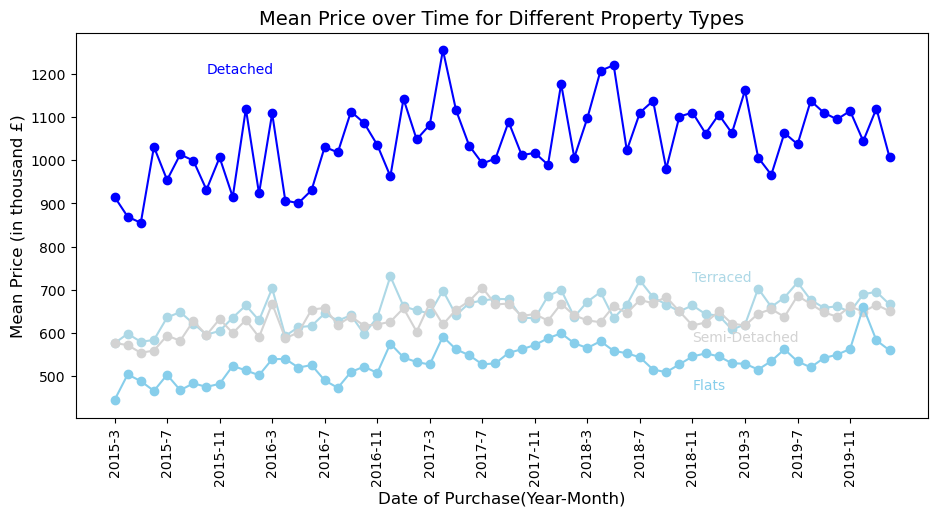

In [271]:
def plot_mean_price_over_time(df, property_types_to_keep, ax):
    color_map = {'D': 'blue', 'E': 'lightblue', 'F': 'skyblue', 'S': '#D3D3D3'}
    # Loop over each property type
    for prop_type in property_types_to_keep:
        df_filtered = df_copy[df_copy['Property_Type'] == prop_type].copy()
        # Convert 'Date_of_Transfer' to datetime
        df_filtered['Date_of_Transfer'] = pd.to_datetime(df_filtered['Date_of_Transfer'])
        # Extract year and month from 'Date_of_Transfer'
        df_filtered['Year'] = df_filtered['Date_of_Transfer'].dt.year
        df_filtered['Month'] = df_filtered['Date_of_Transfer'].dt.month
        # Group by year and month, calculate the mean price for each group
        grouped_df = df_filtered.groupby(['Year', 'Month'])['price'].mean().reset_index()
        # Convert price to thousands of pounds
        grouped_df['price'] /= 1000
        line_color = color_map.get(prop_type, 'lightblue')  
        ax.plot(grouped_df['Year'].astype(str) + '-' + grouped_df['Month'].astype(str), grouped_df['price'], marker='o', linestyle='-', label=prop_type, color=line_color)
        # Add labels on the lines
        if prop_type == 'D':
            ax.text('2015-10', 1200, 'Detached', fontsize=10, color=line_color)
        elif prop_type == 'T':
            ax.text('2018-11', 720, 'Terraced', fontsize=10, color=line_color)
        elif prop_type == 'S':
            ax.text('2018-11', 580, 'Semi-Detached', fontsize=10, color=line_color)
        elif prop_type == 'F':
            ax.text('2018-11', 470, 'Flats', fontsize=10, color=line_color)
    ax.set_xlabel('Date of Purchase(Year-Month)', fontsize=12)  # Reduced fontsize for axis label
    ax.set_ylabel('Mean Price (in thousand £)', fontsize=12)  # Reduced fontsize for axis label
    ax.set_title('Mean Price over Time for Different Property Types', fontsize=14)  # Reduced fontsize for title
    ax.tick_params(axis='x', rotation=90)  # Rotate x-axis labels
    ax.set_xticks(ax.get_xticks()[::4])
fig, ax = plt.subplots(figsize=(11, 5))
plot_mean_price_over_time(df, ['D', 'T', 'S', 'F'], ax)
plt.show()

This graph illustrates the average price of properties sold across different housing types, providing valuable insights into the dynamics of the housing market. It is evident that detached houses typically command higher prices, accompanied by greater price volatility compared to flats, semi-detached, or terraced houses. The average value of flats, semi-detached, or terraced houses tends to hover below the £600 thousand pounds mark, with flats exhibiting the lowest average price. The volatility observed in detached house prices can be attributed to seasonal fluctuations, particularly heightened demand during the spring months as families seek to purchase and relocate before the onset of summer (Ngai & Tenreyro, 2014). This surge in demand often triggers competitive bidding wars among prospective buyers, leading to temporary price escalations despite a consistent level of supply. The premium attached to detached houses reflects consumers' heightened willingness to pay for the privacy and autonomy offered by standalone properties, which do not share walls with neighbors. Notably, a significant shift in the graph occurs after November 2017, defying the typical seasonal decline in property prices associated with colder months marked by reduced sales activity. During this period, flats and terraced houses experienced a positive three-month change in average prices, coinciding with the introduction of the First-Time Buyer's Relief policy. This policy intervention appears to have counteracted the usual market trend for these property types, while detached and semi-detached houses remained largely unaffected. 

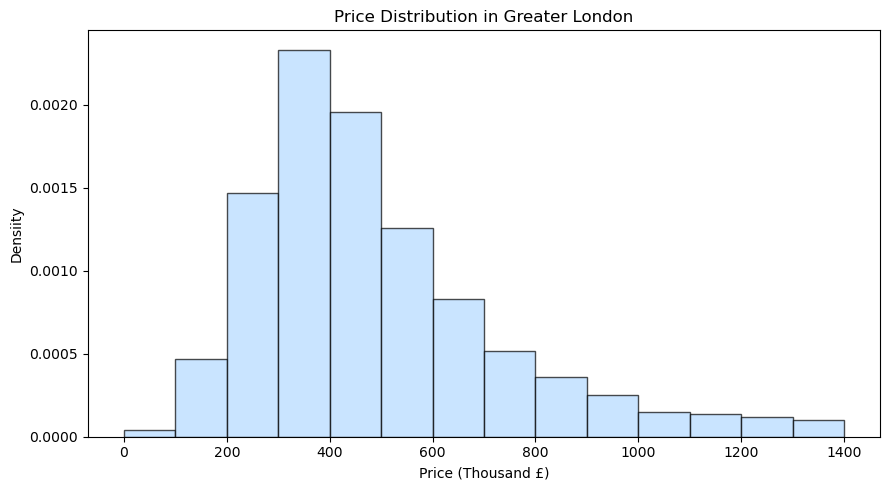

In [272]:
# Determine the 95th percentile of prices to identify outliers
price_95th_percentile = df_copy['price'].quantile(0.95)
# Filter the DataFrame to exclude outliers
df_filtered = df_copy[df_copy['price'] <= price_95th_percentile].copy()  # Ensure copy of DataFrame is made
# Convert prices to thousands for the filtered data
df_filtered.loc[:, 'price_thousands'] = df_filtered['price'] / 1000  # Use .loc[] for assignment
# Determine the minimum and maximum prices in the filtered dataset (in thousands)
min_price = df_filtered['price_thousands'].min()
max_price = df_filtered['price_thousands'].max()
bin_edges = list(range(int(min_price), int(max_price) + 100, 100)) 
plt.figure(figsize=(9, 5))
plt.hist(df_filtered['price_thousands'], bins=bin_edges, color='#b3d9ff', edgecolor='black', alpha=0.7, density=True)
plt.xlabel('Price (Thousand £)')
plt.ylabel('Densiity')
plt.title('Price Distribution in Greater London')
plt.tight_layout()
plt.show()

This graph vividly illustrates the distribution of property values in the Greater London area, highlighting a pronounced skew towards the left side of the price range. The majority of property units are valued below £600 thousand pounds, indicative of a robust demand for more affordable housing options within the market. Specifically, there is a notable concentration of houses and flats purchased in the price range of £300 to £400 thousand pounds, underscoring the prevalence of properties within this relatively lower price bracket. The data reflects the targeted approach of the First-Time Buyer's Relief policy, which aims to facilitate entry into the housing market for first-time buyers by focusing on properties priced below £500 thousand pounds. By implementing a cap on the qualifying property value, the UK government strategically ensures that it can continue to generate tax revenue from higher-priced transactions, thereby contributing to efforts aimed at reducing the national deficit. This policy intervention aligns with broader economic objectives of promoting homeownership among first-time buyers while maintaining fiscal sustainability.

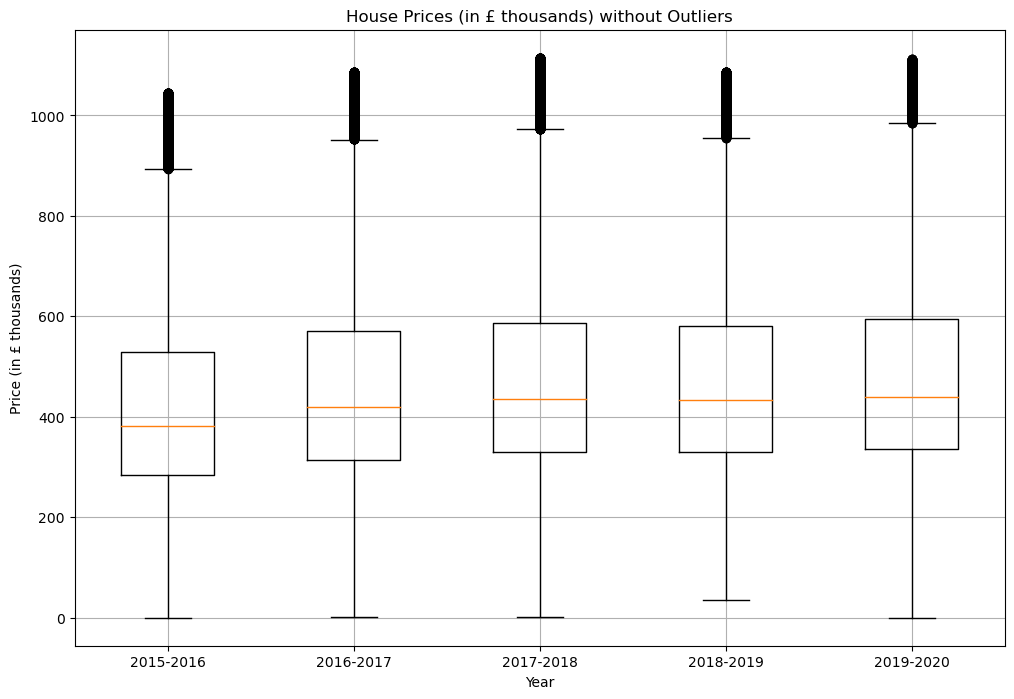

In [273]:
import matplotlib.pyplot as plt
import numpy as np

# List of interval labels
interval_labels = ['March 2015 - February 2016',
                   'March 2016 - February 2017',
                   'March 2017 - February 2018',
                   'March 2018 - February 2019',
                   'March 2019 - February 2020']

# Initialize an empty list to store all data without outliers
all_data_no_outliers = []
years = []

# Loop over each interval
for interval_label in interval_labels:
    # Filter the DataFrame for the specified interval
    df_interval = df_copy[df_copy['Interval_1'] == interval_label]
    years.append(interval_label.split()[1]+ '-'+ interval_label.split()[4])
    # Extract the price data for the interval and divide by 1000
    data = df_interval['price'] / 1000  # Divide by 1000 to convert to thousands of pounds

    # Calculate the first and third quartiles
    q1, q3 = np.percentile(data, [25, 75])

    # Calculate the interquartile range (IQR)
    iqr = q3 - q1

    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Remove outliers from the data
    data_no_outliers = data[(data >= lower_bound) & (data <= upper_bound)]

    # Add data without outliers to the list
    all_data_no_outliers.append(data_no_outliers)

# Create the box plot with all intervals on the same graph
plt.figure(figsize=(12, 8))
plt.boxplot(all_data_no_outliers, labels=years)  # Use years for x-axis labels

# Add title, labels, and grid
plt.title('House Prices (in £ thousands) without Outliers')
plt.xlabel('Year')
plt.ylabel('Price (in £ thousands)')
plt.grid(True)

# Show the plot
plt.show()

This box plot provides insights into the general trends observed in the median price of properties sold across various intervals, independent of other influencing variables. Notably, the data reveals a consistent upward trajectory in the typical price of properties sold from March 2015 to March 2017. However, the rate of increase moderated from March 2017 to March 2018, with minimal fluctuations in median values observed during subsequent intervals. The implementation of the First-Time Buyer's Relief Policy does not correspond to a significant deviation in prices or overall trends within the housing market. This observation underscores the need for further research to explore the specific impact of the policy, particularly in discerning which types of housing may have been most affected by its implementation. 

In [274]:
# Calculate percentage change of mean price from one interval to the other
grouped_df = df_copy.groupby(['Property_Type', 'Before/After', 'Old/New'])

# Calculate the mean price for each group
mean_price = grouped_df['price'].mean()

# Unstack the 'Before/After' level to pivot it into columns
mean_price_unstacked = mean_price.unstack(level='Before/After')

# Calculate the percentage change
percentage_change = ((mean_price_unstacked['After'] - mean_price_unstacked['Before']) / mean_price_unstacked['Before']) * 100

# Rename the Series
percentage_change = percentage_change.rename('Mean_Percent_Change')

# Reset index to get 'Old/New' back as a column
percentage_change = percentage_change.reset_index()

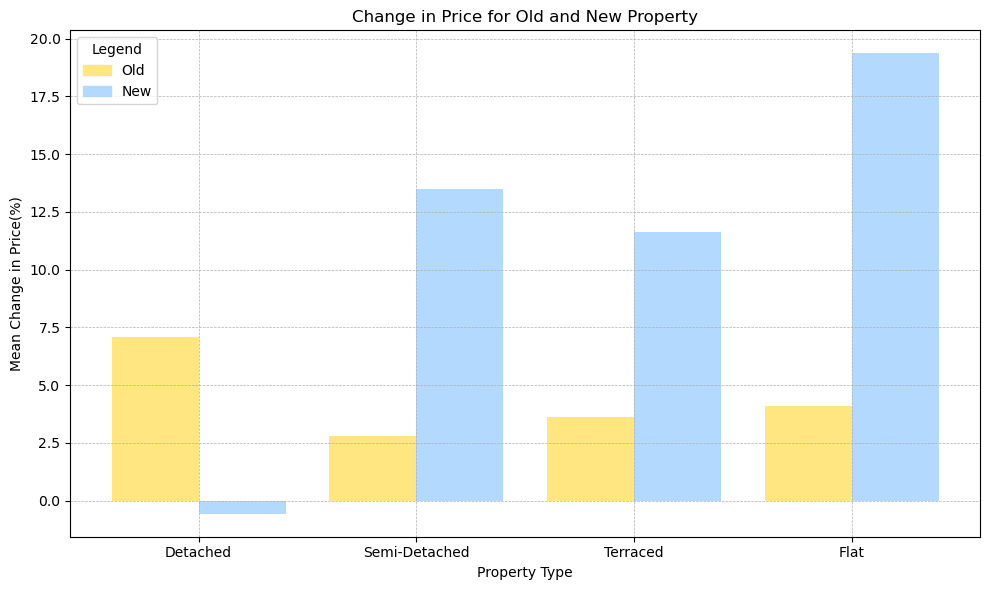

In [275]:
fig, ax = plt.subplots(figsize=(10, 6))
type_order = percentage_change['Property_Type'].unique()
age = percentage_change['Old/New'].unique()

# Set colors for N and Y bars
colors = {'Y': '#b3d9ff', 'N': '#ffe680'}

bar_width = 0.4

for i in range(len(type_order)):
    p_type = type_order[i]
    p_data = percentage_change[percentage_change['Property_Type'] == p_type]
    n_values = p_data[p_data['Old/New'] == 'N']['Mean_Percent_Change'].values
    y_values = p_data[p_data['Old/New'] == 'Y']['Mean_Percent_Change'].values
    ax.bar([i - bar_width / 2] * len(n_values), n_values, width=bar_width, color=colors['N'], label='Old')
    ax.bar([i + bar_width / 2] * len(y_values), y_values, width=bar_width, color=colors['Y'], label='New')
    
ax.set_xticks(range(len(type_order)))
ax.set_xticklabels(['Detached', 'Semi-Detached', 'Terraced', 'Flat'])

legend_handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in ['N', 'Y']]
ax.legend(legend_handles, ['Old', 'New'], title='Legend')

ax.set_ylabel('Mean Change in Price(%)')
ax.set_xlabel('Property Type')
ax.set_title('Change in Price for Old and New Property')

# Add grid
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()

This graph presents a comparative analysis of the growth rates in average property prices for both old and new housing from March 2015 to March 2020. Across all four property types, the data predominantly reflects a positive change in prices for both categories of housing, with New detached houses being the sole exception, demonstrating a marginal decrease in average price over the specified period. Notably, new housing exhibits a notably higher rate of growth in comparison to old housing. New flats emerge as the standout category with the highest rate of growth, reaching an impressive 19% at the extreme value. Among old housing options, detached houses assert their resilience with a solid 6% price growth. These observed increases align closely with the potential policy effects of the First-Time Buyer's Relief, which specifically targets the market for more affordable housing options. Flats and terraced houses, typically lower-priced options, demonstrate the highest rates of price growth, further indicating how the policy might have stimulated demand and prices within these segments of the housing market.

# Project 2

## The Message

The implementation of First Time Buyers' Relief on November 22, 2017 led to a significant price spike of newly-built purchased flats and terraced houses in the Greater London Area between March 2015 and March 2020, reflecting increased demand without corresponding changes in housing supply. These property types were relatively more affordable options in the market and caught buyers' attention first because thet met the eligibility criteria for tax relief. 

In [313]:
group_means = df_copy.groupby(['Property_Type', 'Old/New', 'Interval_2'])['price'].mean()
group_means = pd.DataFrame(group_means)
group_means.reset_index(inplace=True)

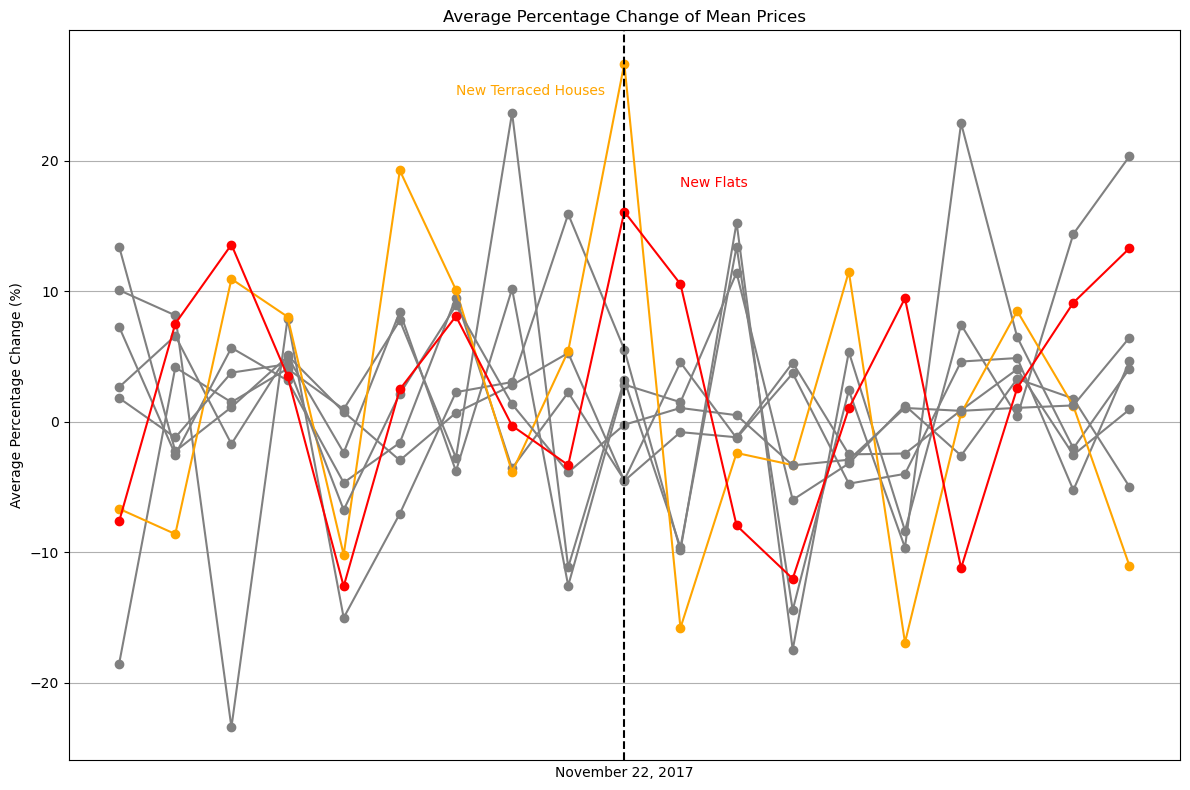

In [295]:
import matplotlib.pyplot as plt

# Assuming you have defined intervals, group_means, property_types_to_keep, and old_new_combinations

plt.figure(figsize=(12, 8))

# Loop through each property type
for property_type in property_types_to_keep:
    # Loop through each old/new combination
    for old_new in age:
        # Filter the data based on property type and old/new combination
        filtered_data = group_means[(group_means['Property_Type'] == property_type) & (group_means['Old/New'] == old_new)]

        percentage_changes = []
        for i in range(len(intervals) - 1):
            interval_start = intervals[i]
            interval_end = intervals[i + 1]

            # Extract the mean prices for the current interval pair
            prices_start = filtered_data.loc[filtered_data['Interval_2'] == interval_start, 'price'].values
            prices_end = filtered_data.loc[filtered_data['Interval_2'] == interval_end, 'price'].values

            if len(prices_start) == 0 or len(prices_end) == 0:
                continue

            # Calculate percentage change for the current interval pair
            percentage_change = ((prices_end - prices_start) / prices_start) * 100
            percentage_changes.append(percentage_change)

        if percentage_changes:
            # Set color conditionally based on property type and old/new combination
            if property_type == 'F' and old_new == 'Y':
                color = 'red'
                plt.text(intervals.index('9 2017 - 11 2017'), 18, 'New Flats', fontsize=10, color=color)
            elif property_type == 'T' and old_new == 'Y':
                color = 'orange'
                plt.text(intervals.index('9 2016 - 11 2016'), 25, 'New Terraced Houses', fontsize=10, color=color)
            else:
                color = 'grey'  # For other combinations
            # Plot the percentage changes for the current property type and old/new combination
            label = f"{property_type} - {old_new}"
            plt.plot(intervals[1:], percentage_changes, marker='o', linestyle='-', label=label, color=color)
            
plt.axvline(x=intervals.index("6 2017 - 8 2017"), color='black', linestyle='--')
plt.title('Average Percentage Change of Mean Prices')
plt.xlabel('November 22, 2017')
plt.ylabel('Average Percentage Change (%)')
plt.grid(True)
plt.xticks([])
plt.tight_layout()
plt.show()

This graph illustrates the percentage change in average prices every three months for various property types, showing significant fluctuations without clear overarching trends over the five-year period. However, by analyzing the day of implementation and consequences of the First Time Buyers' Relief policy, it becomes evident that new terraced houses and new flats experienced the most pronounced increases at 27% and 16% respectively. These property types, aligning with the requirements of the relief, became highly appealing options for first-home purchases, thereby attracting buyers. However, the surge in demand led to price increases only in the initial quarter, followed by a sharp decline, indicating market adjustments.

## Maps and Interpretations

In [296]:
import geopandas as gpd

file_path = "/Users/user/Desktop/ECO225/ECO225Project/Data/London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp"
district_df = gpd.read_file(file_path)

In [297]:
df_maps = df_copy.groupby(['Interval_1', 'District'])['price'].mean()
df_maps = df_maps.reset_index()
df_maps = df_maps.rename(columns={'price': 'Price_Mean', 'District': 'DISTRICT'})

In [298]:
interval1 = 'March 2015 - February 2016'
interval2 = 'March 2019 - February 2020'
df_interval1 = df_maps[df_maps['Interval_1'] == interval1]
df_interval2 = df_maps[df_maps['Interval_1'] == interval2]

# Merge the two DataFrames based on the 'DISTRICT' column
merged_df = pd.merge(df_interval1, df_interval2, on='DISTRICT', suffixes=('_interval1', '_interval2'))

# Calculate the percentage change in price
merged_df['Percentage_Change'] = ((merged_df['Price_Mean_interval2'] - 
                                   merged_df['Price_Mean_interval1']) / merged_df['Price_Mean_interval1']) * 100

# Create a new DataFrame with 'DISTRICT' and 'Percentage_Change' columns
percentage_change_df = merged_df[['DISTRICT', 'Percentage_Change']]

In [299]:
district_df["DISTRICT"] = district_df["DISTRICT"].str.title()
district_df["DISTRICT"] = district_df["DISTRICT"].str.strip()
# Corrected assignment using .loc
percentage_change_df.loc[:, "DISTRICT"] = percentage_change_df["DISTRICT"].str.title()
percentage_change_df.loc[:, "DISTRICT"] = percentage_change_df["DISTRICT"].str.strip()

In [300]:
districts = district_df.merge(percentage_change_df, left_on="DISTRICT", right_on="DISTRICT", how="inner")

In [315]:
#map 4, average price of property in london district
grouped_district_mean = df_copy.groupby('District')['price'].mean().reset_index()
grouped_district_mean = grouped_district_mean.rename(columns={'price': 'Price_Mean', 'District': 'DISTRICT'})
# Convert 'price' column to mean integers and then divide by 1000
grouped_district_mean['Price_Mean'] = (grouped_district_mean['Price_Mean'].astype(int) // 1000)
# Rename the column to reflect the division by a thousand
grouped_district_mean = grouped_district_mean.rename(columns={'Price_Mean': 'Price_Mean (in thousands)'})

In [316]:
grouped_district_mean["DISTRICT"] = grouped_district_mean["DISTRICT"].str.title().str.strip()
districts_price = district_df.merge(grouped_district_mean, left_on="DISTRICT", right_on="DISTRICT", how="inner")

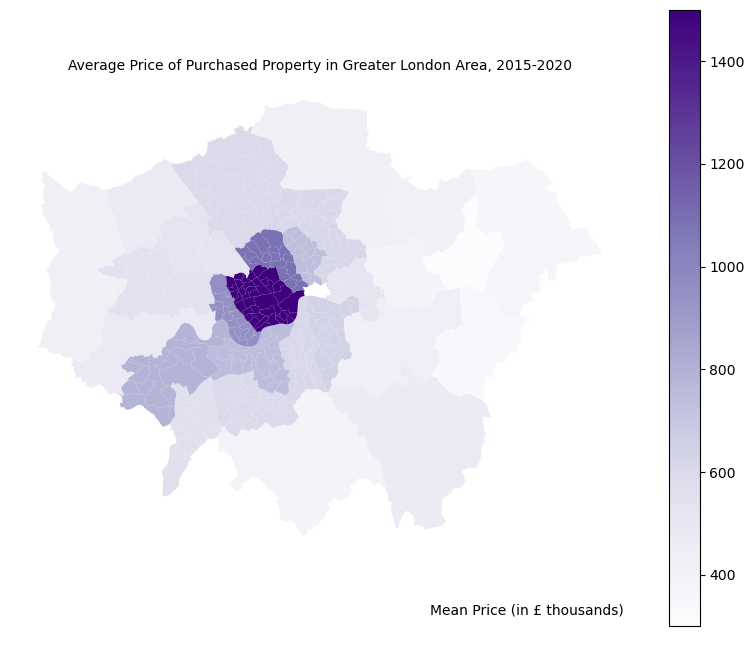

In [320]:
fig, gax = plt.subplots(figsize=(10, 8))

district_df.plot(ax=gax, edgecolor='white', color='white')

districts_price.plot(
    ax=gax, edgecolor='black', linewidth=0, column='Price_Mean (in thousands)', legend=True, cmap='Purples',
    vmin=300, vmax=1500
)


gax.annotate('Mean Price (in £ thousands)', xy=(0.43, 0.07), xycoords='figure fraction')
gax.set_title("Average Price of Purchased Property in Greater London Area, 2015-2020", fontsize=10)
plt.axis('off')
plt.show()

This map illustrates the average prices of properties purchased in each district within the Greater London Area, revealing distinct divisions in housing costs. East London regions typically offer more affordable housing options, while districts in the west tend to be more expensive.  East London has some of the most low-income districts with high degrees of deprivation. These pricing disparities remained consistent throughout the five-year period under study. Areas such as the City of Westminster, Chelsea, and Camden consistently stood out as the most desirable and priciest locations in London, with average property prices reaching up to 1.5 million. As the policy did not target this high-end sector of the market, there should be no significant price changes observed in these areas. In the east of London, housing tends to be more affordable, presenting potential opportunities for first-time homebuyers under the FTB Relief scheme, which could potentially cause increase in demand for housing within those districts and therefore in the housing prices. The values for the City of London on this and following maps are missing because it is not a residential district.

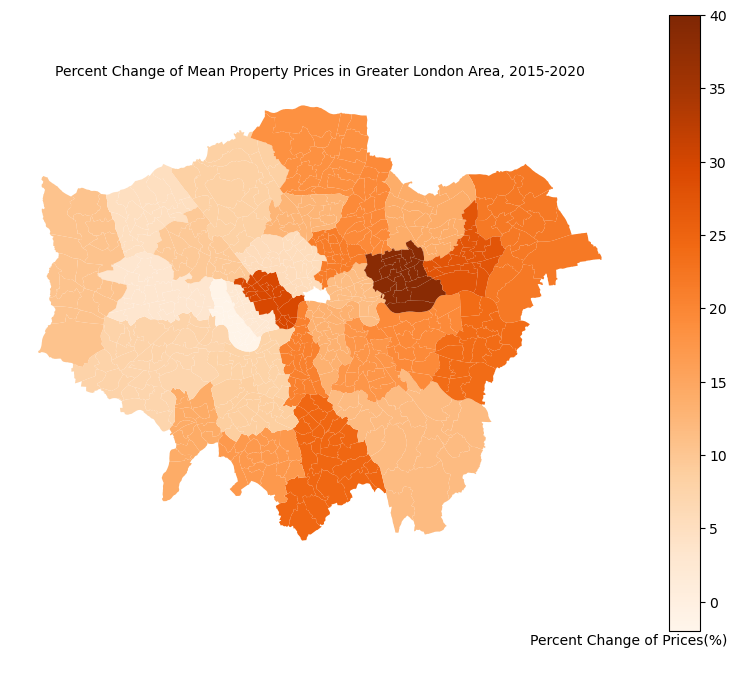

In [326]:
fig, gax = plt.subplots(figsize=(10, 8))

district_df.plot(ax=gax, edgecolor='white', color='white')

districts.plot(
    ax=gax, edgecolor='black', linewidth=0, column='Percentage_Change', legend=True, cmap='Oranges',
    vmin=-2, vmax=40
)


gax.annotate('Percent Change of Prices(%)', xy=(0.53, 0.055), xycoords='figure fraction')
gax.set_title("Percent Change of Mean Property Prices in Greater London Area, 2015-2020", fontsize=10)
plt.axis('off')
plt.show()

This map highlights Newham as the London district where the value of purchased properties surged by nearly 40% between March 2015 and March 2020. However, determining whether this spike can be solely attributed to increased demand resulting from the FTB Relief policy is challenging due to Newham's ongoing gentrification process (Guardian readers & Perry, 2016). Many individuals residing in more central London areas opt to relocate to Newham or nearby areas because it offers the most affordable housing while still being close to the city center. Increased housing demand led to price hikes in the majority of districts in East London.

In [334]:
total_purchases_district = df_copy.groupby('District').size()
flats_district = df_copy[df_copy['Property_Type'] == 'F'].groupby('District').size()
percentage_flat_district = (flats_district / total_purchases_district) * 100
percentage_flat_district_df = pd.DataFrame({
    'DISTRICT': percentage_flat_district.index,
    'Share of Flats': percentage_flat_district.values
})

In [328]:
district_df["DISTRICT"] = district_df["DISTRICT"].str.title().str.strip()
percentage_flat_district_df["DISTRICT"] = percentage_change_df["DISTRICT"].str.title().str.strip()
districts_flats = district_df.merge(percentage_flat_district_df, left_on="DISTRICT", right_on="DISTRICT", how="inner")

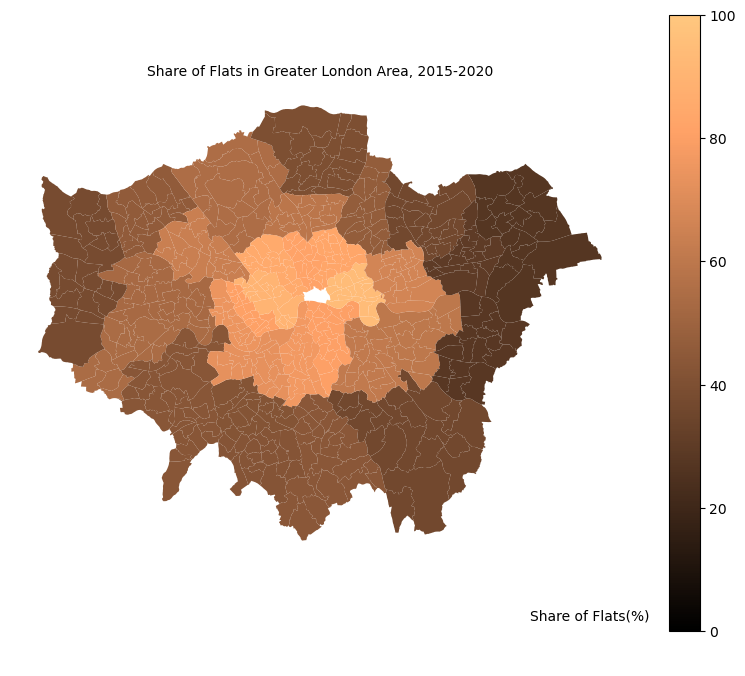

In [329]:
fig, gax = plt.subplots(figsize=(10, 8))

district_df.plot(ax=gax, edgecolor='white', color='white')

districts_flats.plot(
    ax=gax, edgecolor='black', linewidth=0, column='Share of Flats', legend=True, cmap='copper',
    vmin=0, vmax=100
)


gax.annotate('Share of Flats(%)', xy=(0.53, 0.07), xycoords='figure fraction')
gax.set_title("Share of Flats in Greater London Area, 2015-2020", fontsize=10)
plt.axis('off')
plt.show()

This map illustrates the prevalence of flat purchases in inner London, reflecting the dense population in these areas. Given that the FTB Relief policy targets lower-priced and smaller properties, flats emerge as a natural preference. However, juxtaposing this with the preceding maps, it becomes apparent that the choice of flats is primarily driven by their affordability rather than buyers' preferences. While districts in West London also feature a substantial proportion of flats, their prices did not experience significant surges. This can be attributed to the prohibitively high cost of housing in these areas, which exceeds the means of the average buyer. 

In [305]:
#share of new property sold
new_district = df_copy[df_copy['Old/New'] == 'Y'].groupby('District').size()
percentage_new_district = (new_district / total_purchases_district) * 100
percentage_new_district_df = pd.DataFrame({
    'DISTRICT': percentage_flat_district.index,
    'Percentage of New Property': percentage_new_district.values
})

In [306]:
percentage_new_district_df["DISTRICT"] = percentage_change_df["DISTRICT"].str.title().str.strip()
districts_new = district_df.merge(percentage_new_district_df, left_on="DISTRICT", right_on="DISTRICT", how="inner")

In [312]:
unique_districts = district_df['DISTRICT'].unique()
# Filter the DataFrame to keep only the rows with specified ward values
filtered_df_new = df_new[df_new['Ward name'].isin(unique_districts)]
df_new_renamed = filtered_df_new.rename(columns={'Ward name': 'District'})
df_copy["District"] = df_copy["District"].str.title().str.strip()
# Print the filtered DataFrame
# Rename the 'Ward name' column to 'District'
new_merged_df = pd.merge(df_copy, df_new_renamed, on='District')


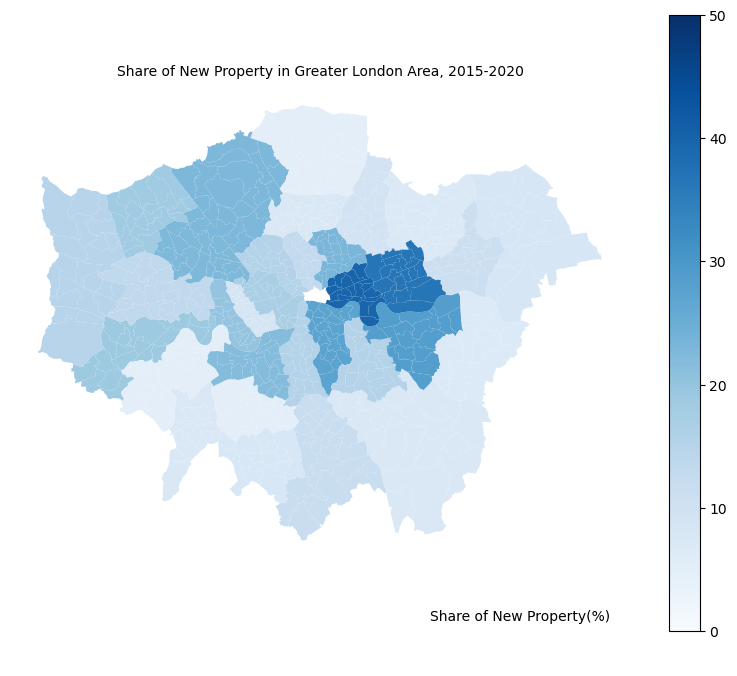

In [335]:
fig, gax = plt.subplots(figsize=(10, 8))

district_df.plot(ax=gax, edgecolor='white', color='white')

districts_new.plot(
    ax=gax, edgecolor='black', linewidth=0, column='Percentage of New Property', legend=True, cmap='Blues',
    vmin=0, vmax=50
)


gax.annotate('Share of New Property(%)', xy=(0.43, 0.07), xycoords='figure fraction')
gax.set_title("Share of New Property in Greater London Area, 2015-2020", fontsize=10)
plt.axis('off')
plt.show()

This map illustrates the distribution of new-built properties across the Greater London Area, with Newham standing out as one of the districts with the largest share. It is important to note that this map does not necessarily suggest that the FTB Relief directly caused an increase in demand followed by a supply increase. Instead, it showcases how the substantial supply of housing, particularly in inner districts of East London, along with a significant share of new properties, contributes to maintaining affordability in Newham. The flow of first-time buyers did not initiate this shift; rather, it reflects broader trends and mechanisms within the Greater London housing market that are beyond governmental control and influence pricing. These areas were already attracting new residents before the implementation of the policy, but they became the primary focus for potential buyers once the policy took effect.

# Merging data sets

In [340]:
# Specify the path to the CSV file
new_dataset_path = "/Users/user/Desktop/ECO225/ECO225Project/Data/ward-profiles-excel-version.csv"

# Define the column names
colnames_new = ['Ward name', 'Old code', 'New code', 'Population - 2015', 'Children aged 0-15 - 2015', 
                'Working-age (16-64) - 2015', 'Older people aged 65+ - 2015', '% All Children aged 0-15 - 2015',
                '% All Working-age (16-64) - 2015', '% All Older people aged 65+ - 2015', 'Mean Age - 2013', 
                'Median Age - 2013', 'Area - Square Kilometres', 'Population density (persons per sq km) - 2013',
                '% BAME - 2011', '% Not Born in UK - 2011', '% English is First Language of no one in household - 2011', 
                'General Fertility Rate - 2013', 'Male life expectancy -2009-13', 'Female life expectancy -2009-13',
                '% children in reception year who are obese - 2011/12 to 2013/14', '% children in year 6 who are obese- 2011/12 to 2013/14', 
                'Rate of All Ambulance Incidents per 1,000 population - 2014', 'Rates of ambulance call outs for alcohol related illness - 2014', 
                'Number Killed or Seriously Injured on the roads - 2014', 'In employment (16-64) - 2011', 'Employment rate (16-64) - 2011', 
                'Number of jobs in area - 2013', 'Employment per head of resident WA population - 2013', 'Rate of new registrations of migrant workers - 2011/12', 
                'Median House Price (£) - 2014', 'Number of properties sold - 2014', 'Median Household income estimate (2012/13)', 'Number of Household spaces - 2011', 
                '% detached houses - 2011', '% semi-detached houses - 2011', '% terraced houses - 2011', '% Flat, maisonette or apartment - 2011', '% Households Owned - 2011', 
                '% Households Social Rented - 2011', '% Households Private Rented - 2011', '% dwellings in council tax bands A or B - 2015', '% dwellings in council tax bands C, D or E - 2015', 
                '% dwellings in council tax bands F, G or H - 2015', 'Claimant rate of key out-of-work benefits (working age client group) (2014)', 'Claimant Rate of Housing Benefit (2015)', 
                'Claimant Rate of Employment Support Allowance - 2014', 'Rate of JobSeekers Allowance (JSA) Claimants - 2015', '% dependent children (0-18) in out-of-work households - 2014', 
                '% of households with no adults in employment with dependent children - 2011', '% of lone parents not in employment - 2011', '(ID2010) - Rank of average score (within London) - 2010',
                '(ID2010) % of LSOAs in worst 50% nationally - 2010', 'Average GCSE capped point scores - 2014', 'Unauthorised Absence in All Schools (%) - 2013', '% with no qualifications - 2011', '% with Level 4 qualifications and above - 2011', 
                'A-Level Average Point Score Per Student - 2013/14', 'A-Level Average Point Score Per Entry; 2013/14', 'Crime rate - 2014/15', 'Violence against the person rate - 2014/15', 'Deliberate Fires per 1,000 population - 2014', '% area that is open space - 2014', 
                'Cars per household - 2011', 'Average Public Transport Accessibility score - 2014', '% travel by bicycle to work - 2011', 'Turnout at Mayoral election - 2012']

# Read the CSV file with specified encoding
df_new = pd.read_csv(new_dataset_path, header=None, names=colnames_new, encoding='ISO-8859-1')
merged = pd.merge(left=df_new, right=df_copy, left_on='Ward name', right_on='District', how='inner')

The new dataset in this research was sourced from the Greater London Authority, responsible for managing comprehensive data concerning all residents of London (Greater London Authority, 2011). This dataset encompasses census data and profiles of all districts, providing relevant information for this study. Variables such as mean age, average income, household composition, and other factors can be examined to discern the characteristics of districts, witnessing the most significant increases in flat and terraced house prices post-FTB Relief. Additionally, this dataset lends enables more extensive regression analysis to investigate how various factors correlate with property prices, presentinng insights on whether factors beyond policy may have contributed to observed changes.

## Conclusion

The introduction of the First Time Buyers' Relief policy on November 22, 2017, had a significant impact on housing prices across various property types in the Greater London Area. Notably, there was a significant short-terrm price surge in newly-built flats and terraced houses between March 2015 and March 2020, reflecting heightened demand driven by the tax relief eligibility criteria. The policy effectively incentivized first-time buyers, amd they searched for more affordable property options, thereby contributing to increased demand and subsequent price increases. However, it is crucial to recognize that the policy's influence on housing prices was not isolated; it interacted with broader market dynamics, such as existing supply levels and ongoing gentrification processes. Also, even though the effect on new flats and terraced houses ere present, the increase lasted only for a few month.

While the FTB Relief policy stimulated demand for certain property types, particularly among first-time buyers, its effects were moderated by factors beyond governmental intervention. The observed price surges in certain districts may be attributed to the policy's impact on demand dynamics. However, the presence of diverse market dynamics, including varying supply levels and demographic shifts, underscores the need for comprehensive research to disentangle the policy's effects from broader market trends. This suggests that while policy interventions can influence housing prices, the housing market's complexities necessitate a nuanced understanding of the interplay between policy measures and broader market forces.

Despite the visible effect of the FTB Relief policy on housing prices, its role varied across different property types and geographical areas within the Greater London Area. For instance, districts with high housing supply, particularly in inner East London, maintained comparative affordability despite increased demand amd increase in prices. This highlights the delicate relationship between policy measures and existing market dynamics, suggesting that policy interventions alone may not fully explain fluctuations in housing prices. Using detailed census data and regression analysis can provide deeper insights into the nuanced impacts of the policy on the price and its interactions with larger market forces. By investigating the complex interplay between policy interventions and market dynamics, such research can inform more effective policy measures aimed at promoting housing affordability and accessibility in the Greater London Area.

## References

1. Bolster, A. (2011). Evaluating the Impact of Stamp Duty Land Tax First Time Buyer’s Relief.. https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=dbc6dd9a2a
67fcd3e76bd3ed699d3533de147d24
2. Bone, J., & O’Reilly, K. (2010). No place called home: the causes and social consequences of the UK housing 'bubble.' The British Journal of Sociology, 61(2), 231–255. https://doi.org/10.1111/j.1468-4446.2010.01311.x
3. Greater London Authority. (2011). Ward Profiles and Atlas – London Datastore. London.gov.uk. https://data.london.gov.uk/dataset/ward-profiles-and-atlas
4. Guardian readers, & Perry, F. (2016, January 13). “You are left with no choice but to leave” – your stories of long-term gentrification. The Guardian; The Guardian. https://www.theguardian.com/cities/2016/jan/13/no-choice-leave-displacement-tales-long-term-gentrification-six-cities
5. HM Land Registry Open Data. (2023). Landregistry.data.gov.uk. https://landregistry.data.gov.uk/
6. Ngai, L. R., & Tenreyro, S. (2014). Hot and Cold Seasons in the Housing Market. American Economic Review, 104(12), 3991–4026. https://doi.org/10.1257/aer.104.12.3991
7. Sabater, A., & Finney, N. (2022). Age segregation and housing unaffordability: Generational divides in housing opportunities and spatial polarisation in England and Wales. Urban Studies. https://doi.org/10.1177/00420980221121088
8. Szumilo, N. (2018). The spatial consequences of the housing affordability crisis in England. Environment and Planning A: Economy and Space, 51(6), 1264–1286. https://doi.org/10.1177/0308518x18811671